In [1]:
import torch

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)


In [3]:
def forward(x):
    y = w*x + b
    return y

In [4]:
x = torch.tensor([[4],[7]])	
forward(x)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [5]:
from torch.nn import Linear

In [6]:
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x_2 = torch.tensor([[2.0], [3.3]])
print(model(x_2))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


## Custom Model Building

In [8]:
import torch.nn as nn
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [9]:
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


In [10]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.2755],
        [0.0816]], grad_fn=<AddmmBackward0>)


## Create Dataset

In [11]:
import matplotlib.pyplot as plt

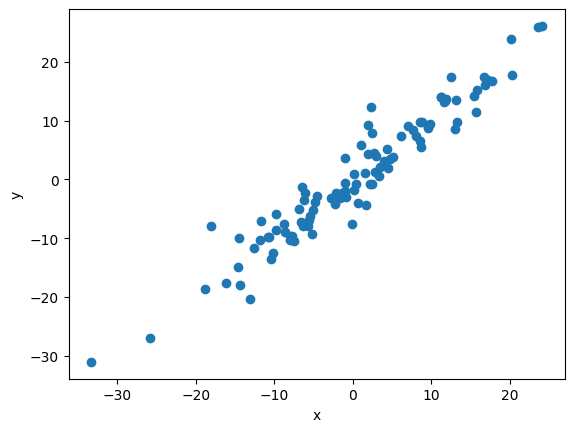

In [12]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.title = 'y = x + noise'

In [13]:
w, d = model.parameters()
print(w, d)
w1 = w[0][0].item() # give number value of tensor
b1 = d[0].item()
print(w1, b1)

def get_params():
    return (w[0][0].item(), d[0].item())

Parameter containing:
tensor([[-0.1939]], requires_grad=True) Parameter containing:
tensor([0.4694], requires_grad=True)
-0.1938614845275879 0.46936893463134766


In [14]:
import numpy as np
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

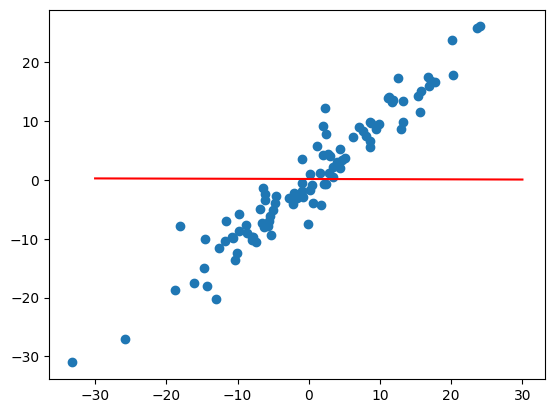

In [15]:
plot_fit('Initial Model')

## Loss Function

In [16]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)